# Predicting Absenteeism At Work using Machine Learning Models

#### Install packages

In [67]:
packages = ['pandas', 'sklearn', 'numpy', 'matplotlib', 'string', 'seaborn', 'sys']
for p in packages:
    # Check if package installed
    import imp
    try:
        imp.find_module(p)
        found = True
    except ImportError:
        found = False
    # if not - install package
    if not found:
        !{sys.executable} -m pip install p

#### Load packages

In [99]:
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import matplotlib.pyplot as plt
from string import ascii_letters
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy.stats import chi2_contingency
import sys

In [100]:
dataset = pd.read_excel('Absenteeism_at_work_with_missing_vals.xls')

## Data Understanding and Pre-processing

In [101]:
# Number of features and amount of samples
dataset.shape

(740, 21)

In [102]:
# Check features datatypes
s = dataset.dtypes
s = pd.DataFrame(s)
s

,0
ID,int64
Reason for absence,float64
Month of absence,float64
Day of the week,object
Seasons,object
Transportation expense,float64
Distance from Residence to Work,float64
Service time,float64
Age,float64
Work load Average/day,float64


In [160]:
categories = ['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons', 'Disciplinary failure', 'Education', 'Social drinker', 'Social smoker']

# Number of Unique values
dataset.nunique()

Month of absence                   13
Day of the week                     5
Transportation expense             25
Distance from Residence to Work    26
Service time                       19
Age                                23
Work load Average/day              39
Hit target                         14
Disciplinary failure                2
Education                           4
Son                                 6
Social drinker                      2
Social smoker                       2
Pet                                 7
Weight                             27
Height                             15
Absenteeism time in hours          20
dtype: int64

In [104]:
dataset.isnull().sum()

ID                                  0
Reason for absence                  3
Month of absence                    1
Day of the week                     0
Seasons                             0
Transportation expense              7
Distance from Residence to Work     3
Service time                        3
Age                                 3
Work load Average/day              10
Hit target                          6
Disciplinary failure                6
Education                          10
Son                                 6
Social drinker                      3
Social smoker                       4
Pet                                 2
Weight                              1
Height                             14
Body mass index                    31
Absenteeism time in hours          22
dtype: int64

In [105]:
dataset.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,Tuesday,Summer,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,Tuesday,Summer,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,Wednesday,Summer,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,Thursday,Summer,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,Thursday,Summer,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [106]:
# Drop unrequired columns
dataset=dataset.drop(["ID"],axis=1)

In [107]:
# Change strings to integers
def mapping(data,feature):
    featureMap=dict()
    count=0
    for i in sorted(data[feature].unique(),reverse=True):
        featureMap[i]=count
        count=count+1
    data[feature]=data[feature].map(featureMap)
    return data

categories_to_numbers = ['Day of the week','Seasons']
for col in categories_to_numbers:
    dataset=mapping(dataset,col)

### Dealling with Missing Values

In [108]:
# Missing values in total
dataset.isnull().sum().sum()
dataset.isnull().sum()/len(dataset)*100

Reason for absence                 0.405405
Month of absence                   0.135135
Day of the week                    0.000000
Seasons                            0.000000
Transportation expense             0.945946
Distance from Residence to Work    0.405405
Service time                       0.405405
Age                                0.405405
Work load Average/day              1.351351
Hit target                         0.810811
Disciplinary failure               0.810811
Education                          1.351351
Son                                0.810811
Social drinker                     0.405405
Social smoker                      0.540541
Pet                                0.270270
Weight                             0.135135
Height                             1.891892
Body mass index                    4.189189
Absenteeism time in hours          2.972973
dtype: float64

In [109]:
# Deal with missing values - strategy can be changed to "median" and “mode”
col_names = list(dataset.columns)
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values=np.nan, strategy='mean')
values = dataset.values
dataset = imp.fit_transform(values)

In [110]:
dataset = pd.DataFrame(dataset)
dataset.columns = col_names

In [111]:
for col in categories:
    dataset[col] = round(dataset[col])

### Data Visuaization

#### Bar plot - Categorial Features

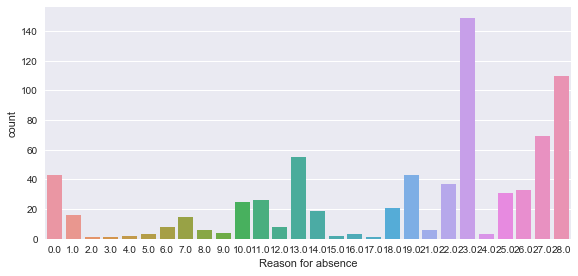

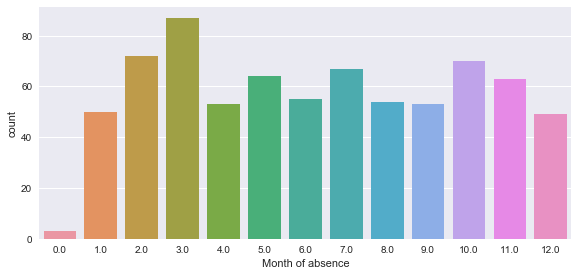

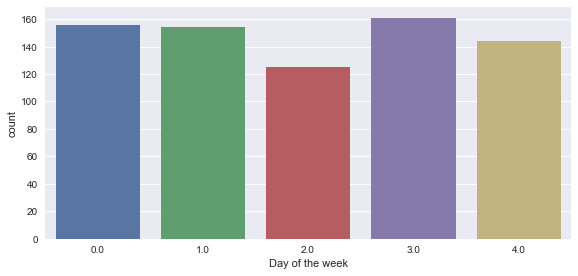

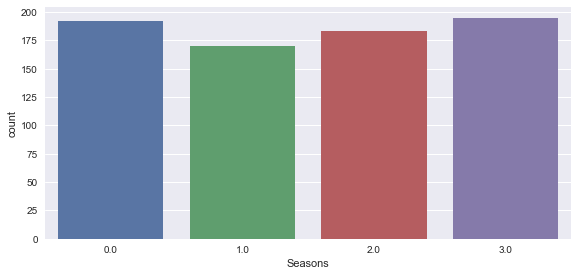

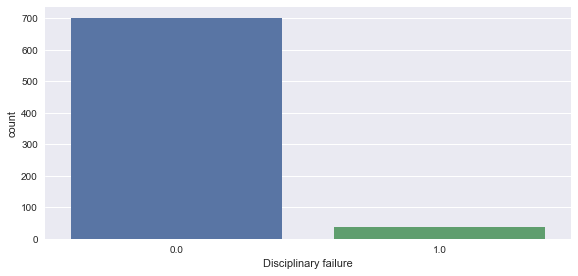

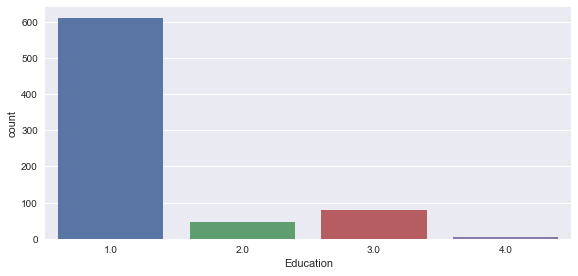

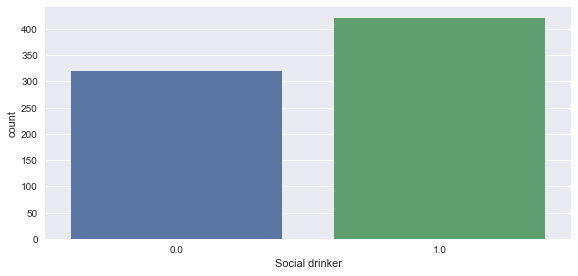

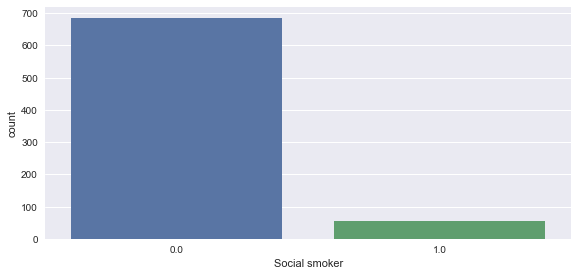

In [14]:
# Bar graphs - for categorical features
for col in categories:
    sns.factorplot(data=dataset, x=col, kind= 'count',size=4,aspect=2)
plt.show()

#### Descriptive statistics

In [112]:
# Change to categorial data type
for col in categories:
    dataset[col] = dataset[col].astype('category')

In [113]:
# Get numeric data
all_columns = dataset.columns
num_columns = dataset._get_numeric_data().columns

# Descriptive statistics
dataset[num_columns].describe()

,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Son,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,221.035471,29.667571,12.565807,36.449118,271188.860274,94.587193,1.017711,0.746612,79.063599,172.152893,26.684062,6.977716
std,66.636321,14.817955,4.380894,6.466981,38717.235037,3.777277,1.090474,1.317939,12.859920,6.023188,4.201815,13.274842
min,118.000000,5.000000,1.000000,27.000000,205917.000000,81.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,179.000000,16.000000,9.000000,31.000000,244387.000000,93.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,225.000000,26.000000,13.000000,37.000000,264604.000000,95.000000,1.000000,0.000000,83.000000,171.000000,25.000000,3.000000
75%,260.000000,50.000000,16.000000,40.000000,284853.000000,97.000000,2.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,388.000000,52.000000,29.000000,58.000000,378884.000000,100.000000,4.000000,8.000000,108.000000,196.000000,38.000000,120.000000


#### Histogram - Numerical Features

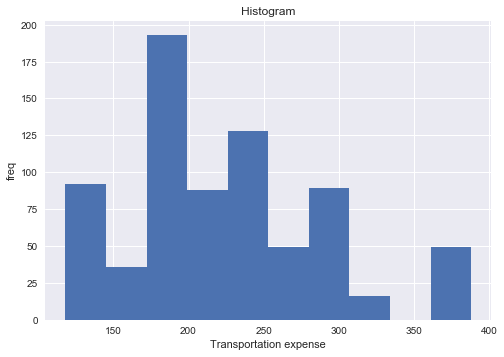

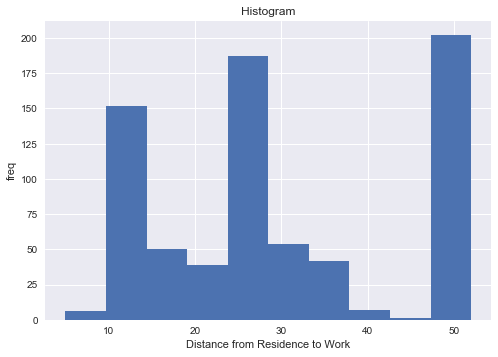

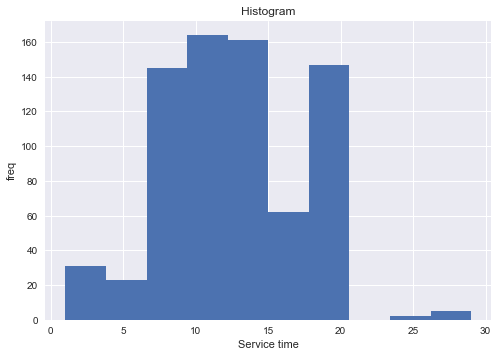

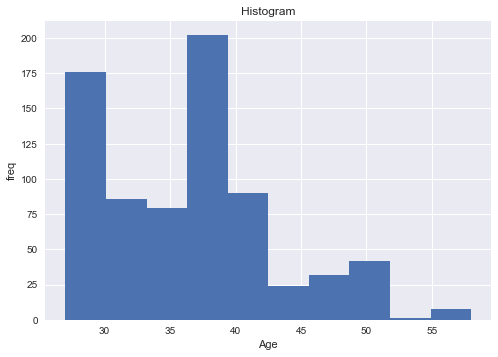

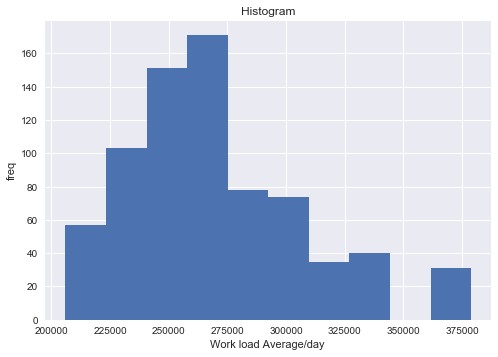

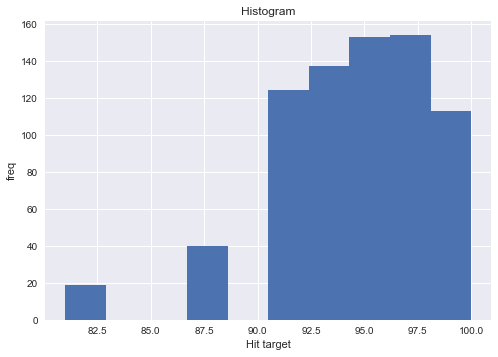

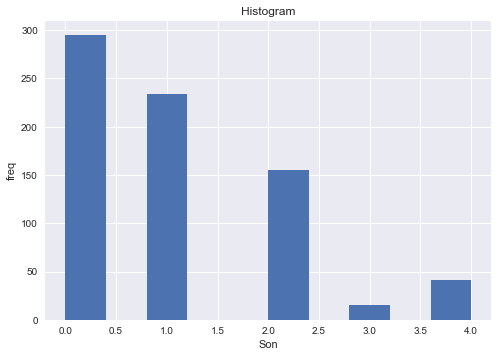

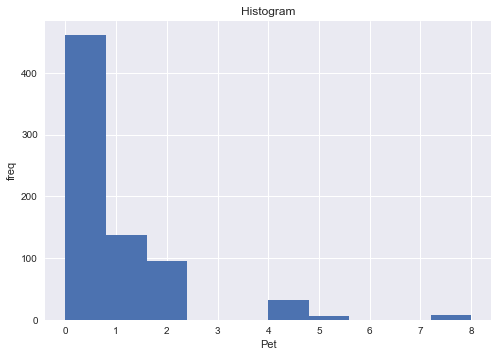

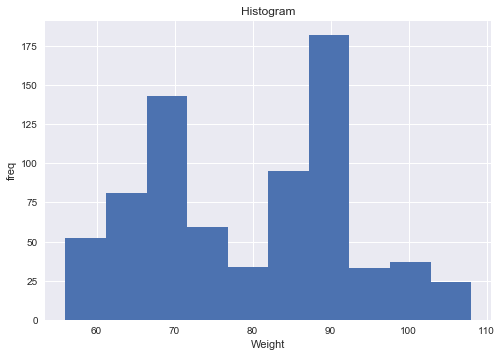

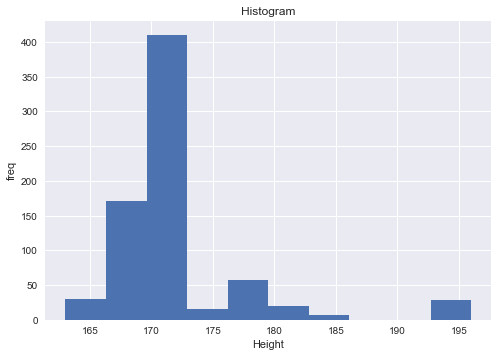

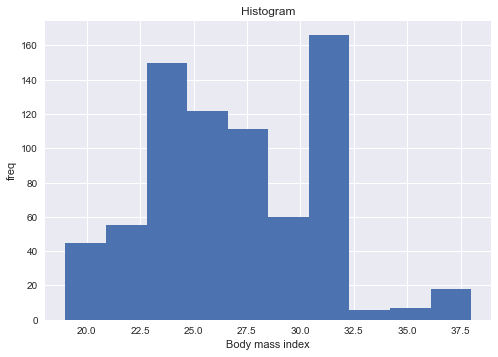

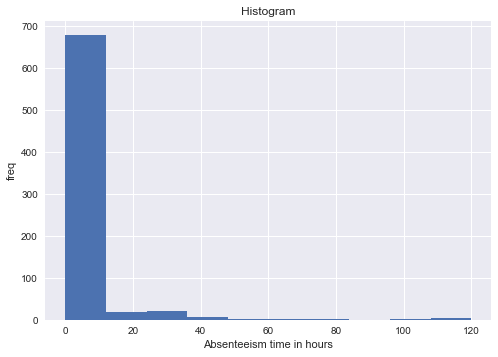

In [17]:
for col in num_columns:
    plt.hist(dataset[col])
    plt.xlabel(col)
    plt.ylabel('freq')
    plt.title('Histogram')
    plt.grid(True)
    plt.show()

### Dealing with Multicollinearity

#### Numeric Features

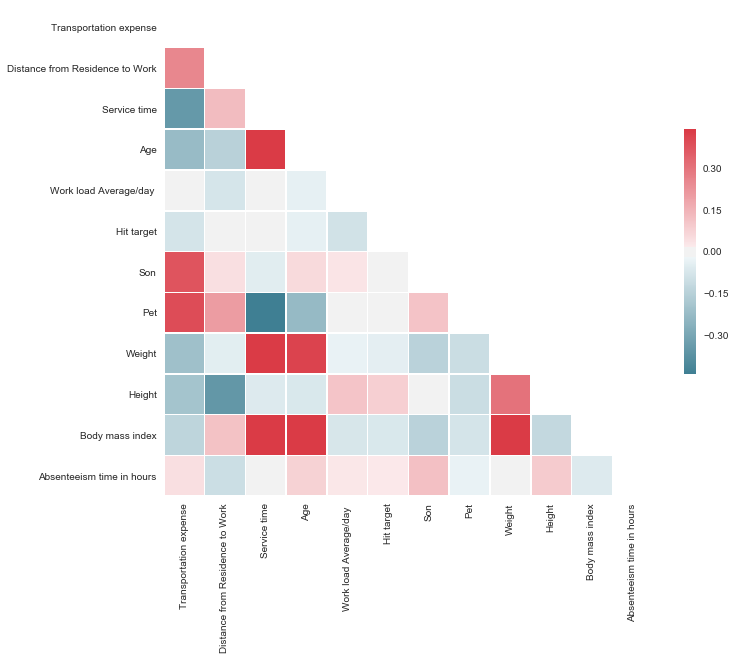

In [114]:
# Compute the correlation matrix for the numeric features
sns.set(style="white")

corr = dataset[num_columns].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [115]:
corr = dataset[num_columns].corr().abs()
co = corr.unstack()

In [116]:
sort_cor = co.sort_values(kind="quicksort")
sort_cor[sort_cor > 0.8]

Body mass index                  Weight                             0.884579
Weight                           Body mass index                    0.884579
Transportation expense           Transportation expense             1.000000
Height                           Height                             1.000000
Weight                           Weight                             1.000000
Pet                              Pet                                1.000000
Son                              Son                                1.000000
Hit target                       Hit target                         1.000000
Work load Average/day            Work load Average/day              1.000000
Age                              Age                                1.000000
Service time                     Service time                       1.000000
Distance from Residence to Work  Distance from Residence to Work    1.000000
Body mass index                  Body mass index                    1.000000

In [117]:
# Deal with multicollinearity
to_drop = ['Body mass index']
dataset = dataset.drop(to_drop, axis = 1)

In [118]:
num_columns = num_columns.drop(to_drop)

#### Categorial Features

In [129]:
# Using Chi-square test to check correlation between categorical features
'''
H0: features preference are not associated 
H1: features preference are associated 
'''    
factors_paired = [(i,j) for i in categories for j in categories] 
chi2, p_values =[], []
for f in factors_paired:
    if f[0] != f[1]:
        chitest = chi2_contingency(pd.crosstab(dataset[f[0]], dataset[f[1]]))
        chi2.append(chitest[0])
        p_values.append(chitest[1])
    else:
        chi2.append(0)
        p_values.append(0)
s = len(categories)
p = np.array(p_values).reshape(s,s)
p = pd.DataFrame(p, index=categories, columns=categories)
p

,Reason for absence,Month of absence,Day of the week,Seasons,Disciplinary failure,Education,Social drinker,Social smoker
Reason for absence,0.000000e+00,1.219489e-18,0.061291,3.916180e-22,2.601804e-123,1.318261e-10,3.081870e-08,2.985250e-09
Month of absence,1.219489e-18,0.000000e+00,0.557581,0.000000e+00,1.893204e-04,1.365815e-02,9.858660e-03,2.370121e-02
Day of the week,6.129057e-02,5.575807e-01,0.000000,1.953925e-01,3.042452e-01,5.484674e-01,6.056688e-01,8.076879e-01
Seasons,3.916180e-22,0.000000e+00,0.195393,0.000000e+00,8.428010e-05,8.040298e-02,1.365297e-01,8.000933e-02
Disciplinary failure,2.601804e-123,1.893204e-04,0.304245,8.428010e-05,0.000000e+00,3.674572e-01,2.711790e-01,3.240643e-03
Education,1.318261e-10,1.365815e-02,0.548467,8.040298e-02,3.674572e-01,0.000000e+00,7.846132e-35,3.677654e-21
Social drinker,3.081870e-08,9.858660e-03,0.605669,1.365297e-01,2.711790e-01,7.846132e-35,0.000000e+00,8.492374e-03
Social smoker,2.985250e-09,2.370121e-02,0.807688,8.000933e-02,3.240643e-03,3.677654e-21,8.492374e-03,0.000000e+00


In [133]:
# The null hypothesis is rejected when p < 0.001
p1 < 0.001

,Reason for absence,Month of absence,Day of the week,Seasons,Disciplinary failure,Education,Social drinker,Social smoker
Reason for absence,True,True,False,True,True,True,True,True
Month of absence,True,True,False,True,True,False,False,False
Day of the week,False,False,True,False,False,False,False,False
Seasons,True,True,False,True,True,False,False,False
Disciplinary failure,True,True,False,True,True,False,False,False
Education,True,False,False,False,False,True,True,True
Social drinker,True,False,False,False,False,True,True,False
Social smoker,True,False,False,False,False,True,False,True


In [155]:
# Deal with multicollinearity
to_drop = ['Seasons']
dataset = dataset.drop(to_drop, axis = 1)

In [163]:
categories.remove('Seasons')

### Data Smoothing and Outlier Detection

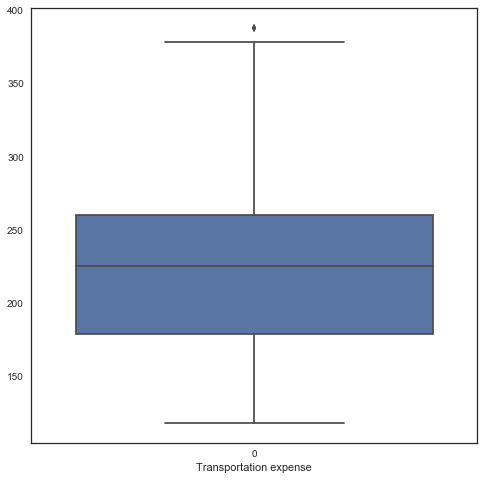

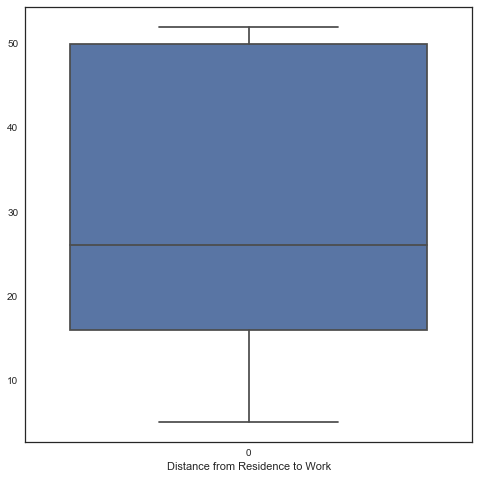

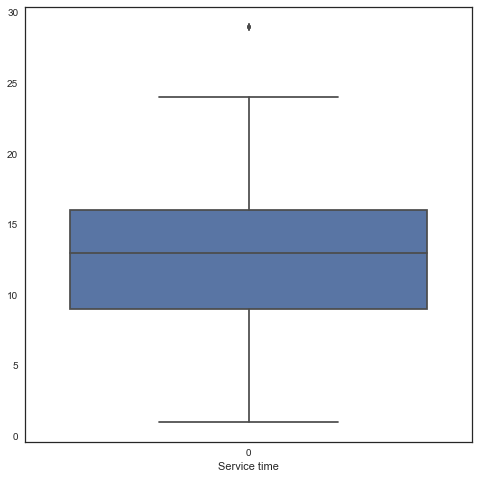

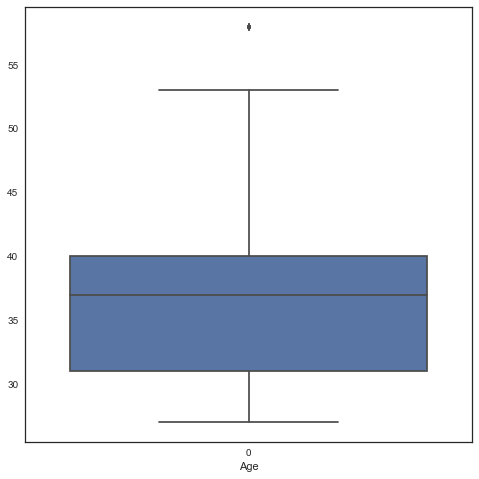

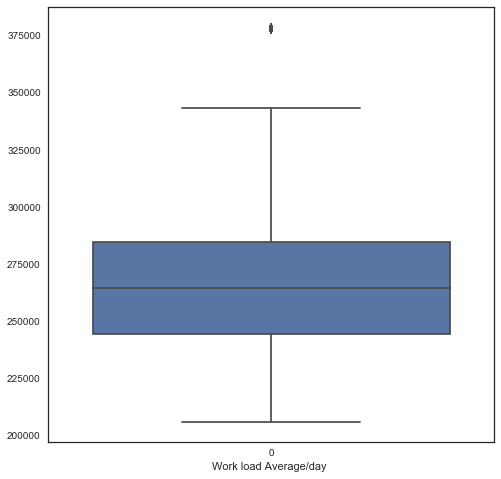

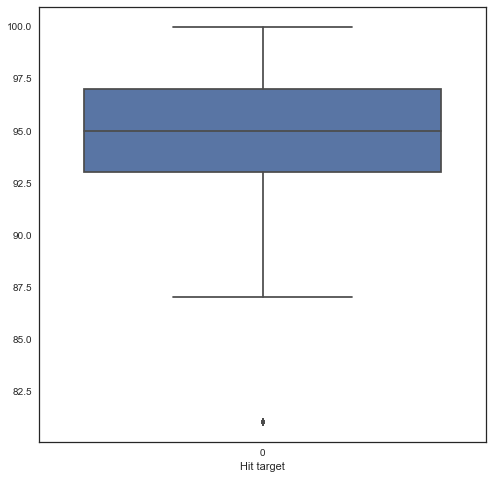

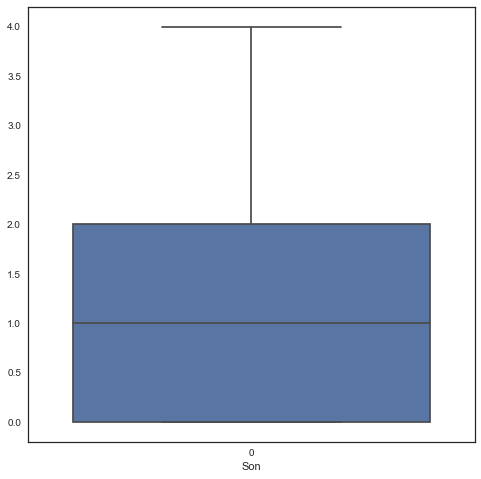

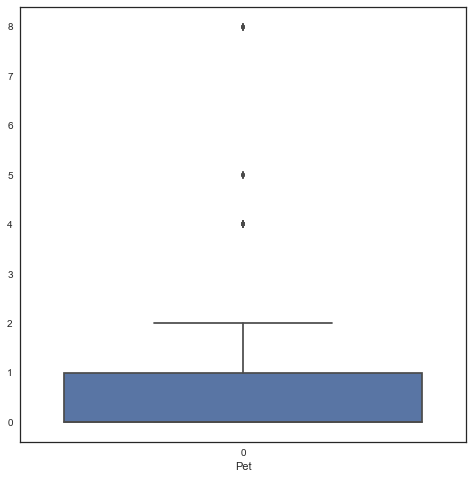

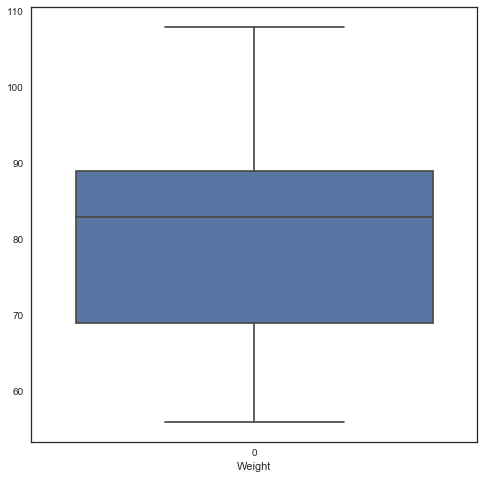

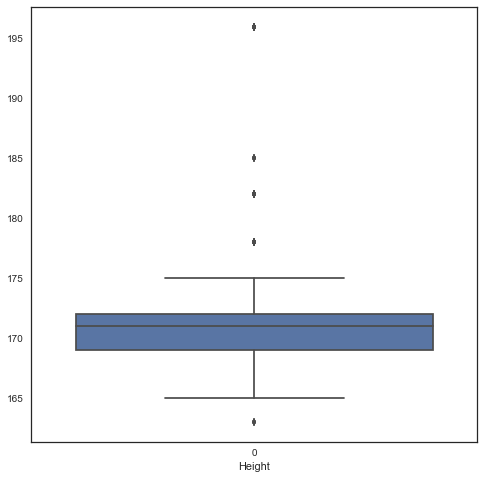

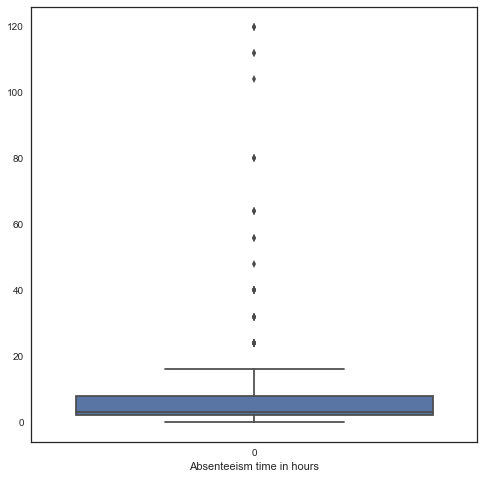

In [23]:
# Boxplot - check for outliers
# sns.boxplot(data=dataset[dataset._get_numeric_data().columns])
for col in dataset._get_numeric_data():
    sns.boxplot(data=dataset[col])
    plt.xlabel(col)
    fig=plt.gcf()
    fig.set_size_inches(8,8)
    plt.show()

In [24]:
# Check for outliers 
for col in num_columns:
    # Getting 75 and 25 percentile of variable "i"
    q75, q25 = np.percentile(dataset[col], [75,25])
    
    # Calculating Interquartile range
    iqr = q75 - q25
    
    # Calculating upper extream and lower extream
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    
    # Replacing all the outliers value to NA
    dataset.loc[dataset[col]< minimum,col] = np.nan
    dataset.loc[dataset[col]> maximum,col] = np.nan

In [25]:
# Strategy can be changed to "mean" and “mode”
for col in dataset._get_numeric_data().columns:
    dataset[col] = dataset[col].fillna(dataset[col].median())

##  Feature Scaling

In [26]:
# Separating out the features
features = dataset.drop(['Absenteeism time in hours'], axis=1)
# Separating out the target
labels = dataset.loc[:,['Absenteeism time in hours']].values

In [371]:
# Standarize data except the categorials
for col in features._get_numeric_data():
    features[col]=(features[col]-features[col].min())/(features[col].max()-features[col].min())

## Modeling

In [27]:
# Hot-code encoding
features = pd.get_dummies(features)
features.shape

(740, 70)

### Hyper-Parameters Tuning

In [28]:
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [29]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [30]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [40]:
# Use the random grid to search for best hyperparameters
# rf model creation
rf = RandomForestRegressor()
# Use 3 fold cv and 100 different combinations
rf_model = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_model.fit(train_features, train_labels)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.2min finished
C:\Users\user\Anaconda3\envs\cs231n\lib\site-packages\sklearn\model_selection\_search.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_estimator.fit(X, y, **self.fit_params)


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring=None, verbose=2)

In [41]:
rf_model.best_params_

{'bootstrap': False,
 'max_depth': 90,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 600}

In [44]:
# Eliminating dividing by zero
test_labels = test_labels+0.000001

### Train Model

#### Random Forest

In [68]:
# Train the model again with the chosen hyper-parameters
rf = RandomForestRegressor()
rf_model = RandomForestRegressor(n_estimators = 600, random_state = 42)
rf_model.fit(train_features, train_labels)

C:\Users\user\Anaconda3\envs\cs231n\lib\site-packages\ipykernel\__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=600, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

#### Polynomial Regression

In [76]:
def pol_model(d):
    pol_model = PolynomialFeatures(degree = d)
    pol_train_features = pol_model.fit_transform(train_features)
    pol_test_features = pol_model.fit_transform(test_features)
    poly_regression = LinearRegression()
    poly_regression.fit(pol_train_features,train_labels)
    return poly_regression, pol_test_features

## Model Evaluation

In [71]:
def evaluate(test_labels, predictions):
    mape = mean_absolute_error(test_labels, predictions)
    mse = mean_squared_error(test_labels, predictions)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.2f} degrees.'.format(mape))
    print('MSE = {:0.2f}.'.format(mse))

#### Random Forest

In [72]:
rf_predictions = rf_model.predict(test_features)
rf_errors = abs(rf_predictions - test_labels)
evaluate(test_labels, rf_predictions)

Model Performance
Average Error: 1.99 degrees.
MSE = 7.53.


#### Polynomial Regression

In [81]:
poly2, pol2_test_features = pol_model(2)
pol2_predictions = poly.predict(pol2_test_features)
plo2_errors = abs(pol2_predictions - test_labels)
evaluate(test_labels, pol2_predictions)

Model Performance
Average Error: 6.72 degrees.
MSE = 91.78.


In [79]:
poly3, pol3_test_features = pol_model(3)
pol3_predictions = poly3.predict(pol3_test_features)
plo3_errors = abs(pol3_predictions - test_labels)
evaluate(test_labels, pol3_predictions)

Model Performance
Average Error: 6.76 degrees.
MSE = 91.07.
